In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

import io
from scipy import misc

from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

%matplotlib inline

## Spotify Song Attribiutes EDA (exploratory data analysis)
- train a classifier
- predict target usng the training classifier

In [3]:
data=pd.read_csv("C:/Users/ramzi/Desktop/Python files/Data Science/Spotify_data.csv")

In [3]:
data=data.drop(['Unnamed: 0'],axis=1)

In [4]:
data.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(4), object(2)
memory usage: 252.2+ KB


In [4]:
data.head(5)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


## To find the positive and negative tempos from the Target

In [6]:
# we can do that for the rest of the datasets and check them against the target. 
pos_tempo=data[data['target']==1]['tempo']
neg_tempo=data[data['target']==0]['tempo']

# e.g, which we will print down below in a chart
pos_dance=data[data['target']==1]['danceability']
neg_dance=data[data['target']==0]['danceability']


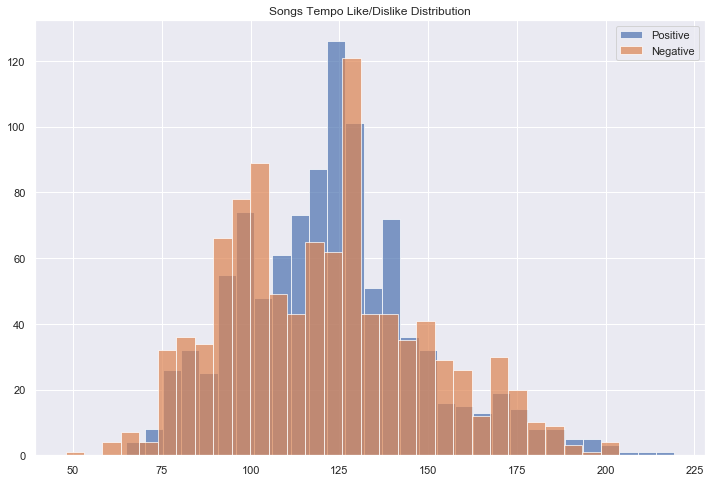

In [7]:
fig=plt.figure(figsize=(12,8))
plt.title('Songs Tempo Like/Dislike Distribution')
pos_tempo.hist(alpha=0.7,bins=30,Label='Positive')
neg_tempo.hist(alpha=0.7,bins=30,label='Negative')
plt.legend(loc='upper right')

C:\Users\ramzi\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


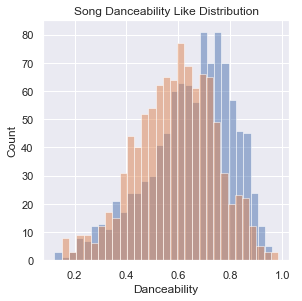

In [8]:
# the chart for dance

fig2=plt.figure(figsize=(15,15))
ax3=fig2.add_subplot(331)  ## in our 3x3 sub grid, it will be in location 1
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like Distribution')

pos_dance.hist(alpha=0.5,bins=30,Label='Positive')

ax4=fig2.add_subplot(331) # this is to print the negative plot

neg_dance.hist(alpha=0.5,bins=30,label='Negative')

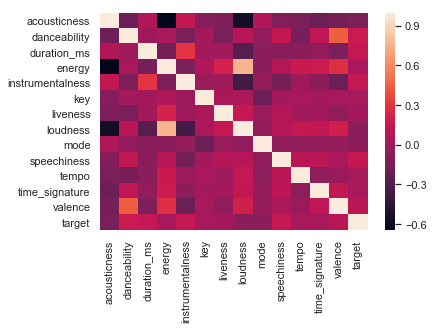

In [9]:
corr = data.corr()
sns.heatmap(corr)

## We will use the Random Forest tree

In [10]:
### create a checkpoint

data_unscaled=data.copy()

In [74]:
y = data_unscaled['target']
X_unscaled = data_unscaled.drop(['target','artist','song_title'],axis=1)

In [12]:
#### This is optional to standardize the data. but make sure not to standardize the target since its already in 0 and 1


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
data_scaler=StandardScaler()

# create the Custom Scaler class

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    # init or what information we need to declare a CustomScaler object
    # and what is calculated/declared as we do
   
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
       
       # scaler is nothing but a Standard Scaler object
        self.scaler = StandardScaler(copy,with_mean,with_std)
        # with some columns 'twist'
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    
    # the fit method, which, again based on StandardScale
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    # the transform method which does the actual scaling

    def transform(self, X, y=None, copy=None):
        
        # record the initial order of the columns
        init_col_order = X.columns
        
        # scale all features that you chose when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        
        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        
        # return a data frame which contains all scaled features and all 'not scaled' features
        # use the original order (that you recorded in the beginning)
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

## We now apply the above scaler to the columns

In [13]:
X_unscaled.columns.values

array(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'], dtype=object)

In [14]:
columns_to_scale=X_unscaled.columns.values

In [15]:
data_scaler=CustomScaler(columns_to_scale)

In [16]:
data_scaler.fit(X_unscaled)

C:\Users\ramzi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


CustomScaler(columns=array(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'], dtype=object),
       copy=None, with_mean=None, with_std=None)

In [17]:
X_scaled=data_scaler.transform(X_unscaled)

C:\Users\ramzi\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [21]:
X_scaled.shape

(2017, 13)

## To do the Random Forest Regression

In [22]:
y=data_unscaled['target']
X=X_scaled

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, 
                                                    random_state=123, 
                                                    stratify=y)

In [26]:
clf = RandomForestRegressor()

In [35]:
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [42]:
clf.score(X_train,y_train)

0.867422633289258

## To test it on the Test data

In [60]:
clf.score(X_test,y_test)

## the prediction is weak for the test data

0.28933260711692066

## Tuning the Model

In [70]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [71]:
pipeline = make_pipeline(preprocessing.StandardScaler(),RandomForestRegressor(n_estimators=100))

In [72]:
## WE do the crossvalidation

clf = GridSearchCV(pipeline, hyperparameters, cv=10)

In [73]:
## we check the best parameters
clf.fit(X_train, y_train)
clf.best_params_

{'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'log2'}

In [68]:
## New prediction
y_pred = clf.predict(X_test)

In [69]:
## Test the new model
r2_score(y_test, y_pred)

0.3539142658641974

## Decision Tree Classificiation 

In [62]:
c=DecisionTreeClassifier(min_samples_split=100)